In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [49]:
from mle_toolbox import load_result_logs
from mle_toolbox.utils import load_meta_log


import os
import sys

sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from utils.visualize_experiments import (plot_roi_subject_grid, plot_average_scores,
                                         plot_bo_scores, plot_perf_per_layer, plot_best_layer)

In [69]:
meta_log

In [70]:
experiment_dir = "../experiments/roi/elastic_alexnet_bo_50"
meta_log, hyper_log = load_result_logs(experiment_dir)

# Bayesian Optimization Procedure Across Network Feature Layers

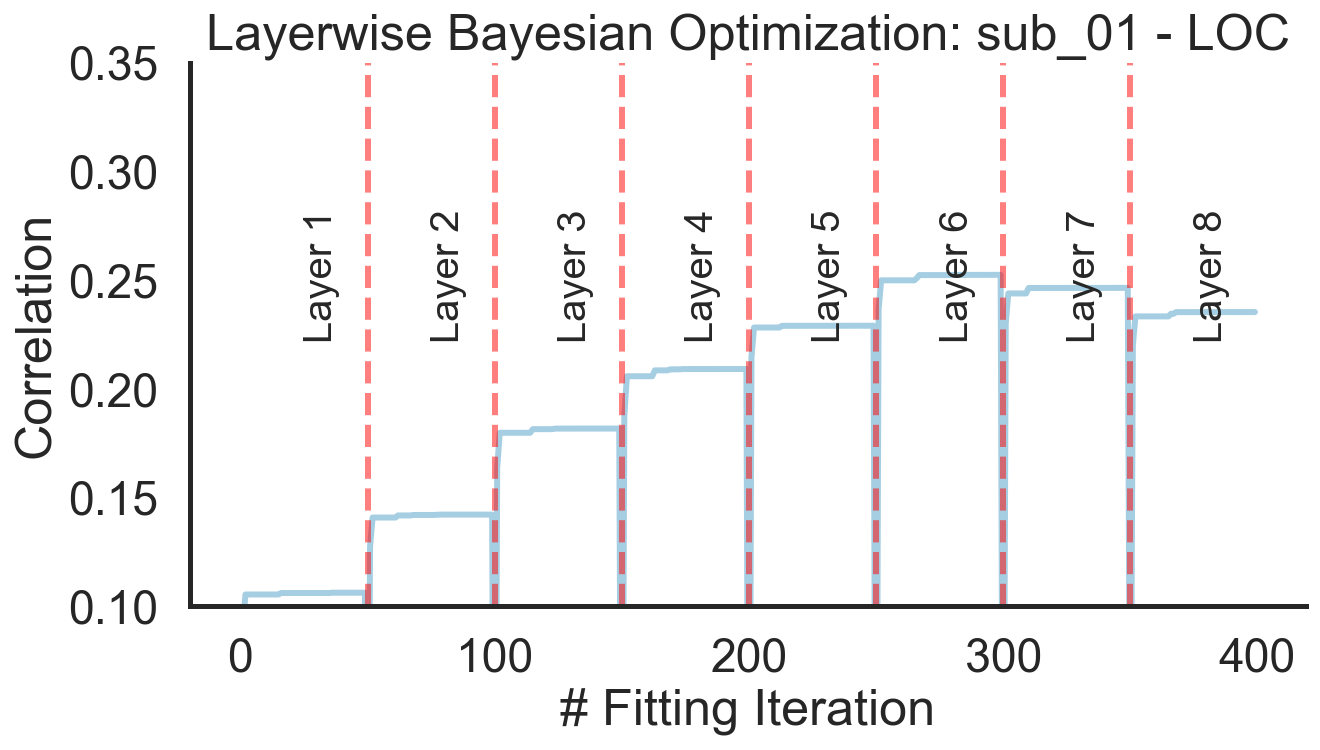

In [71]:
plot_bo_scores(meta_log, "b_1_eval_0", subject_id="sub_01", roi_type="LOC", num_bo_per_layer=50, num_layers=8)

# Performance Across Subjects and ROIs

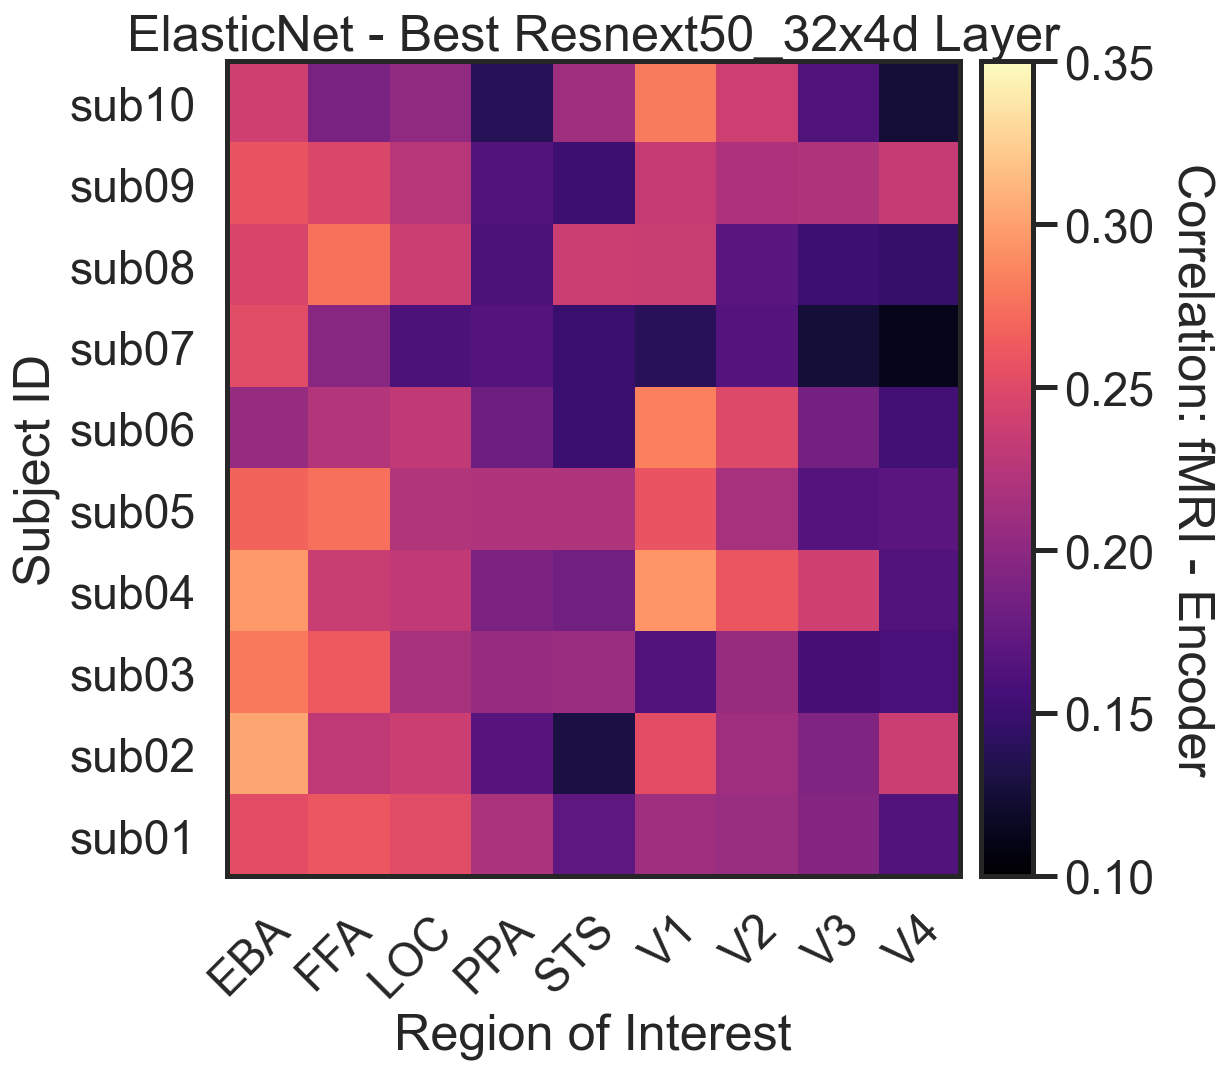

In [72]:
plot_roi_subject_grid(hyper_log, title="ElasticNet - Best Resnext50_32x4d Layer")

# Meaned Scores - Subject and ROI

[0.24869725 0.22669587 0.19883051 0.18287519 0.25993322 0.29820592
 0.26729358 0.19817313 0.1995646 ]


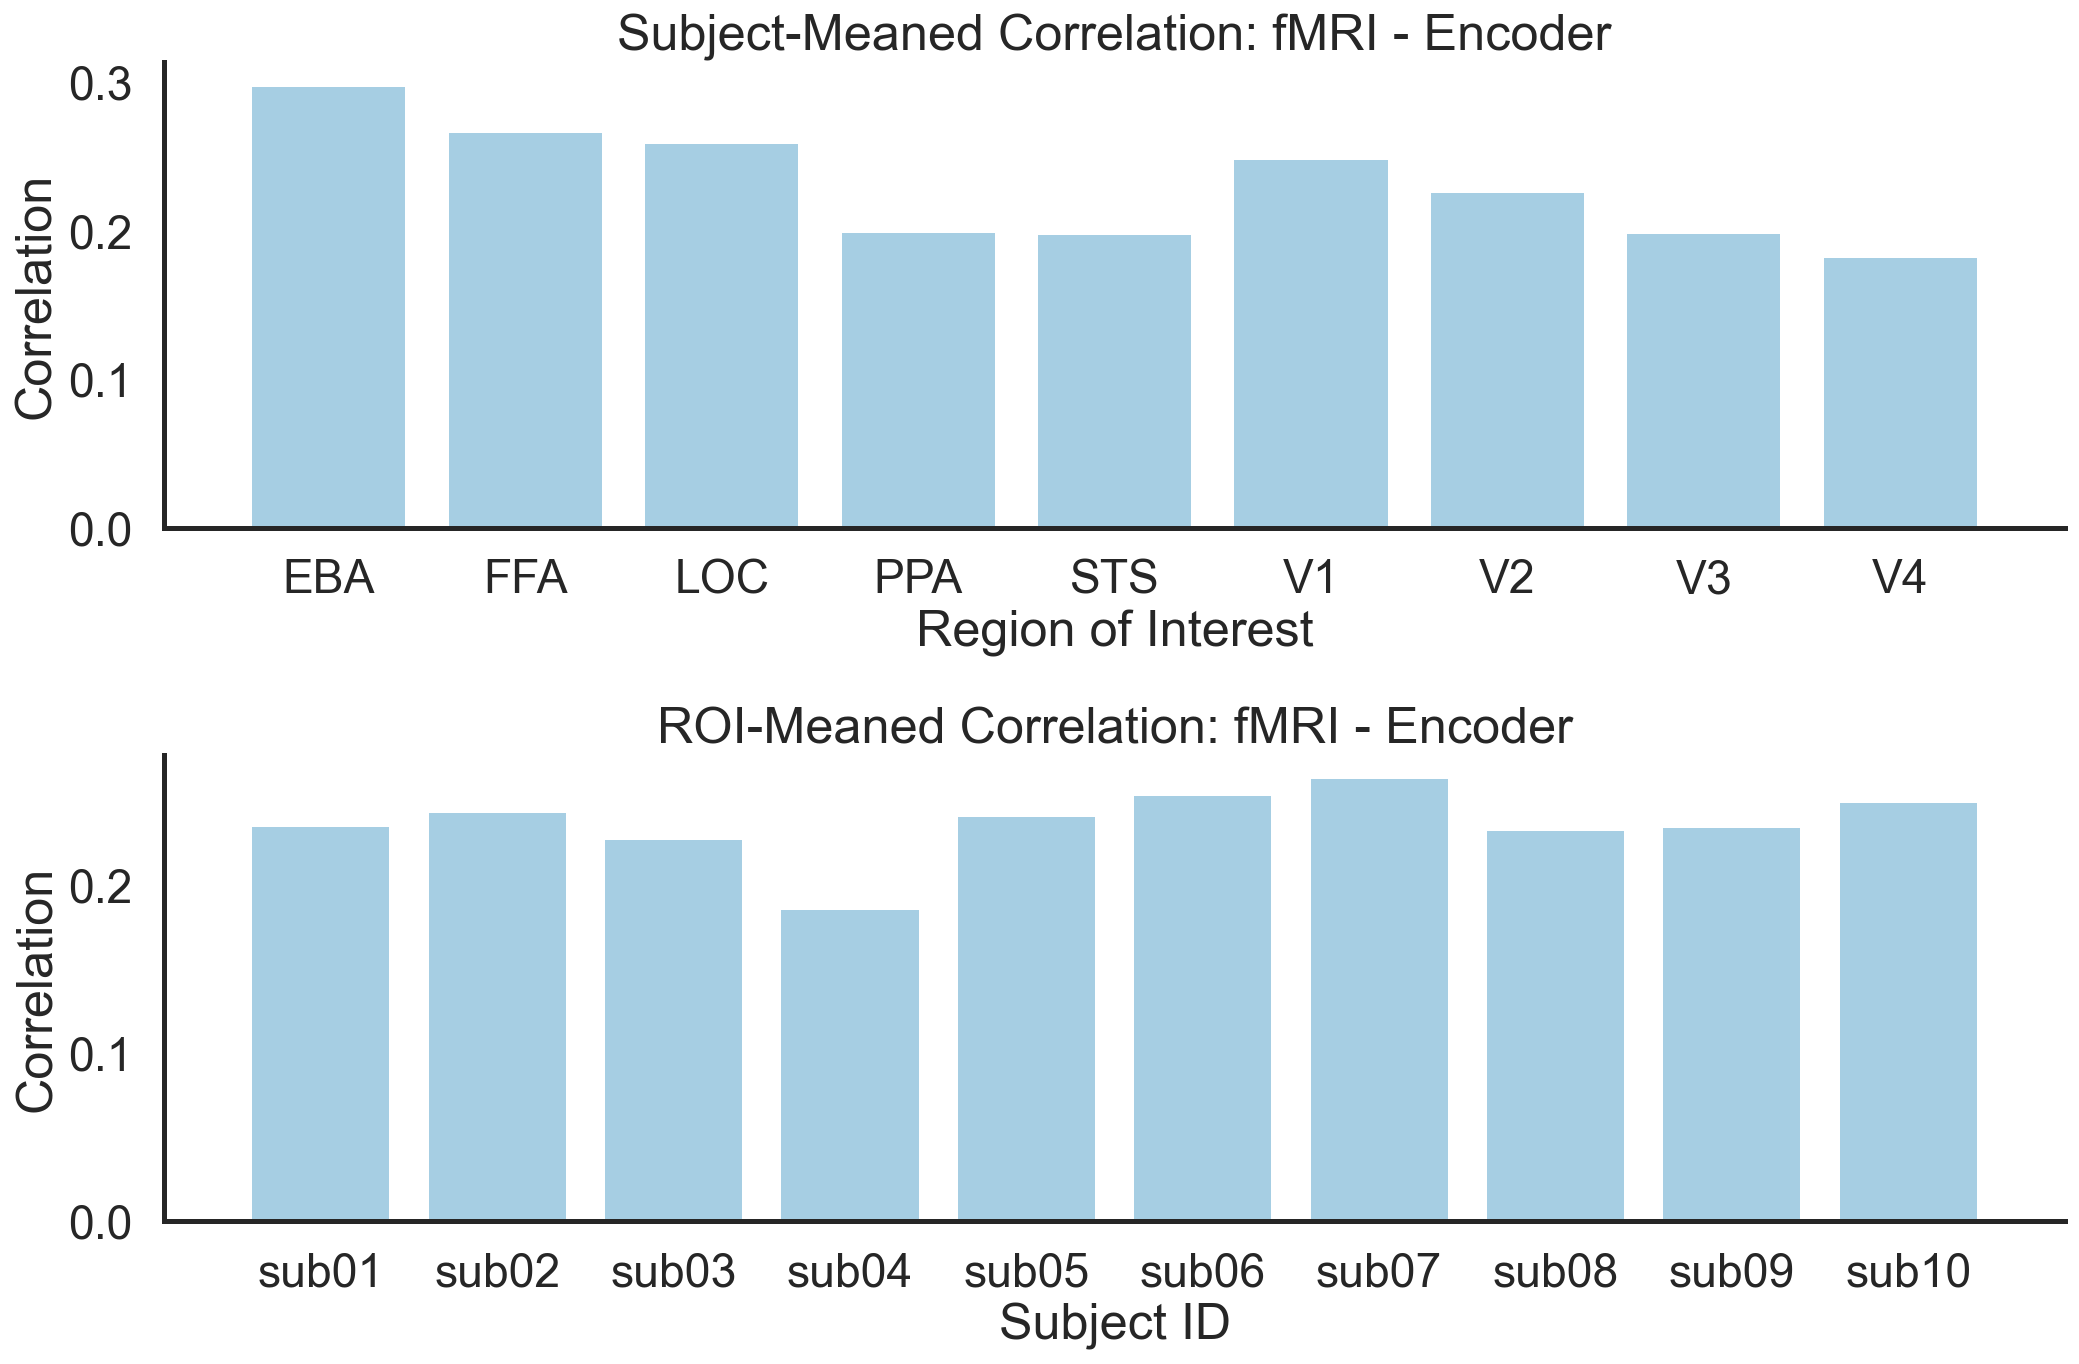

In [64]:
scores = plot_average_scores(hyper_log)
print(scores)

# Performance Per Layer

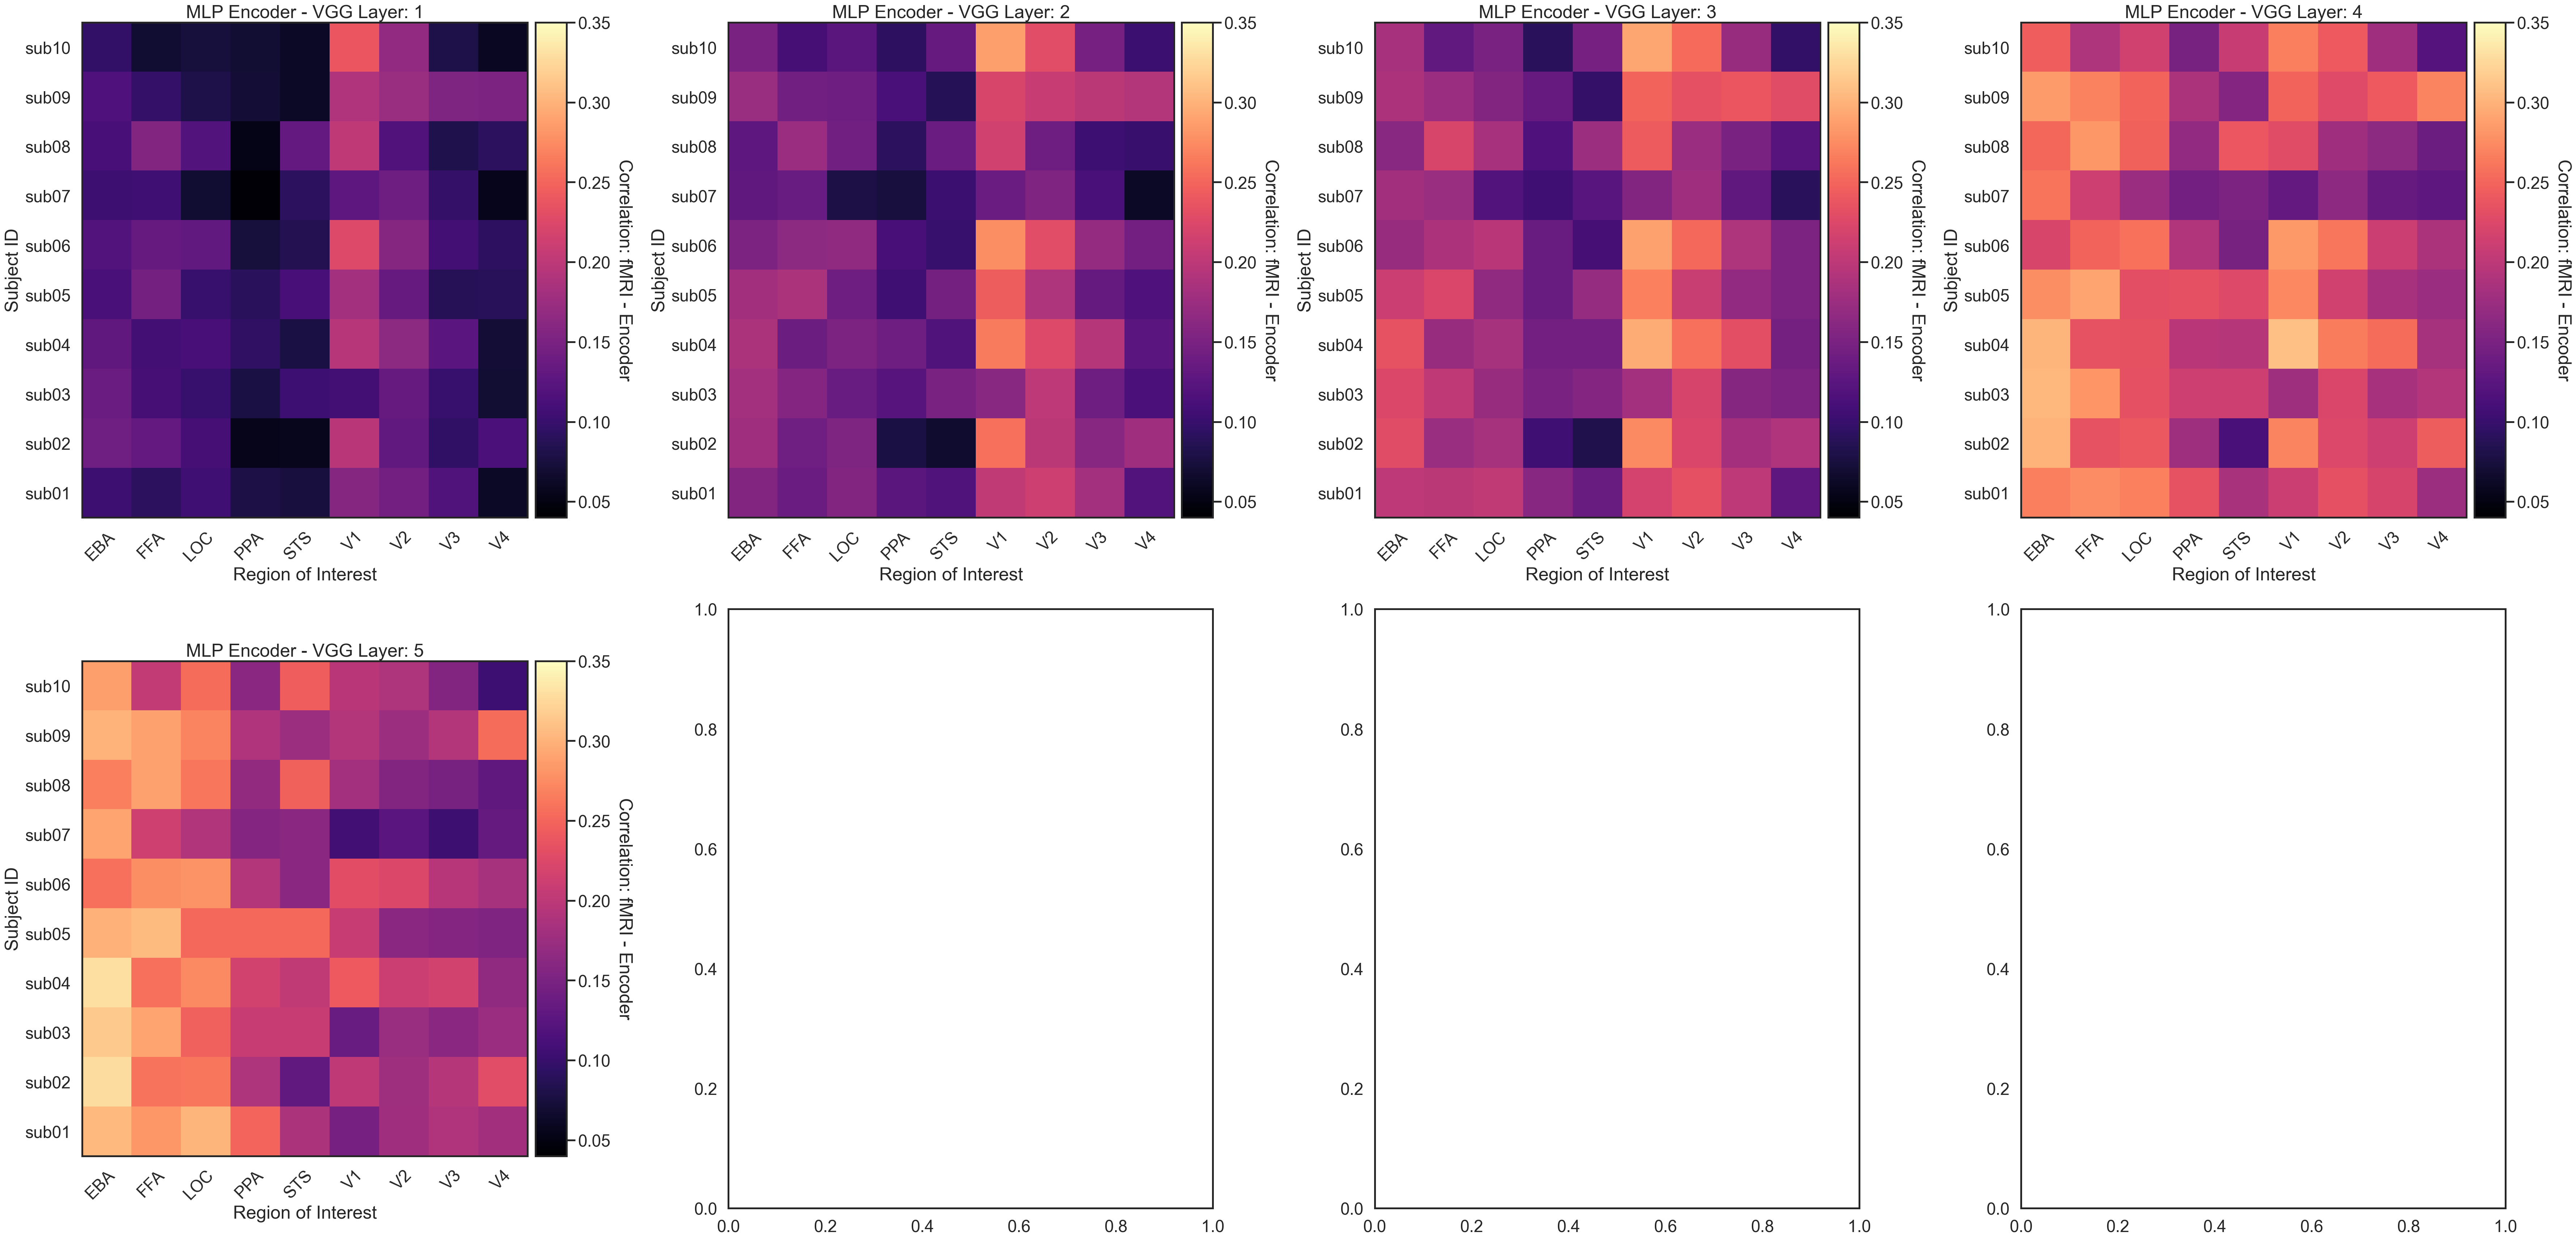

In [65]:
plot_perf_per_layer(hyper_log, meta_log, num_bo_per_layer=50, num_layers=5)

# Best Layer Per ROI/Subject

../utils/visualize_experiments.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_layer_df['best_layer_id'] = [int(l[-1]) for l in max_layer_df.layer_id]


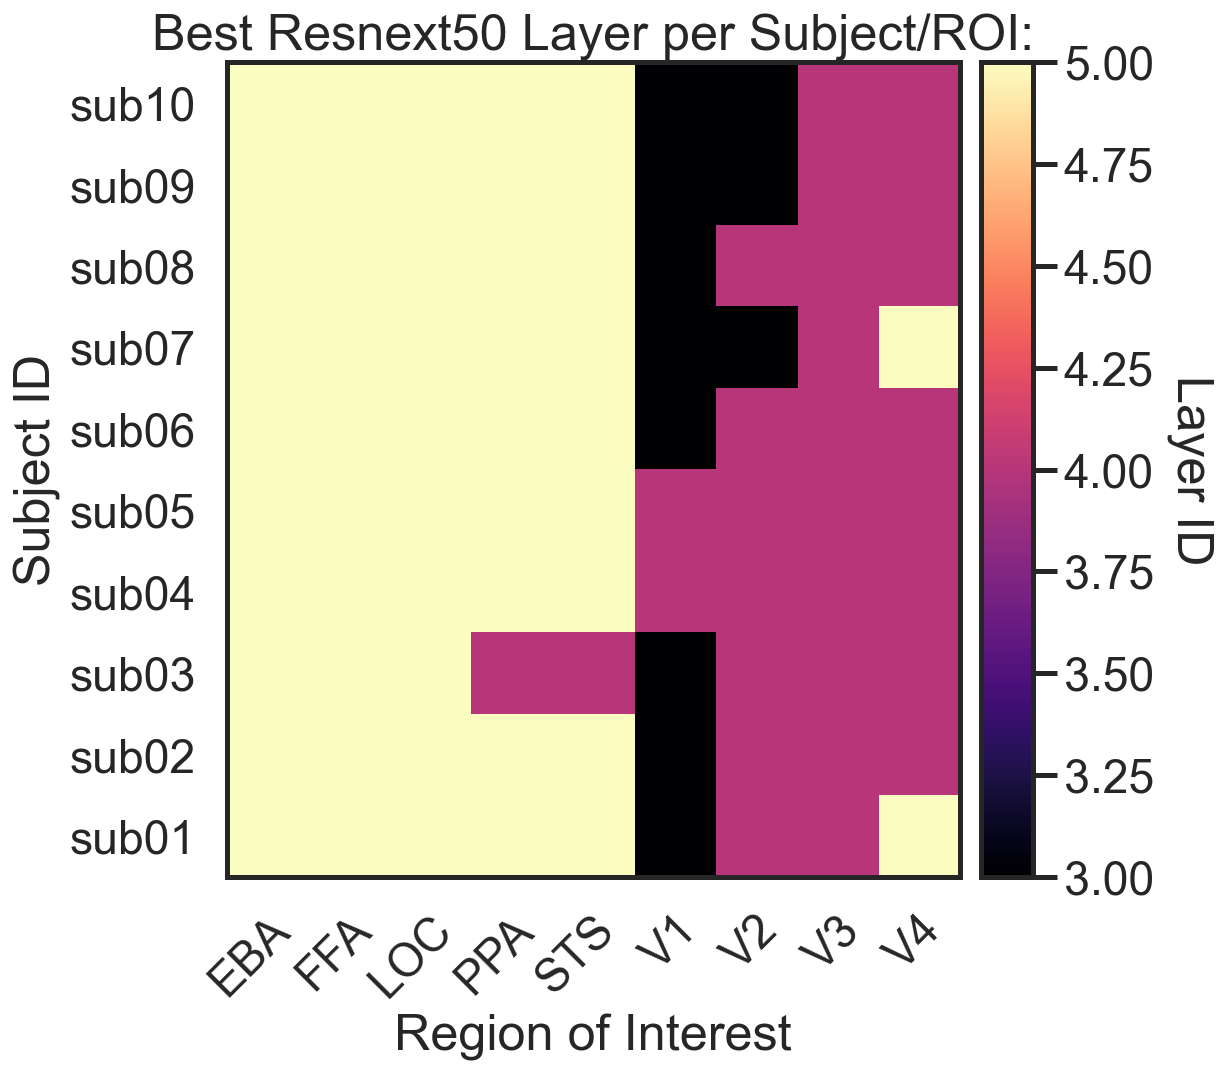

In [68]:
plot_best_layer(hyper_log, meta_log, num_layers=5,
                num_bo_per_layer=50,
                title="Best Resnext50 Layer per Subject/ROI:")